# Step 1 
# Read the data into your software

In [1]:
import pandas as pd

try:
    df = pd.read_csv("IMA2.csv", encoding ="utf-8")
except IOError:
     print("ERROR")
else:
    print("SUCCESS")

df      

SUCCESS


,ID,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,StartDate
0,1,41,Yes,Sales,1 miles,College,Life Sciences,Medium,Very High,Single,"$5,993.00",8,Bad,23/11/2015
1,2,49,No,Research & Development,8 miles,Below College,Life Sciences,High,Medium,Married,"$5,130.00",1,Better,10/10/2011
2,3,37,Yes,Research & Development,2 miles,College,Other,Very High,High,Single,"$2,090.00",6,Better,19/8/2021
3,4,33,No,Research & Development,3 miles,Masters,Life Sciences,Very High,High,Married,"$2,909.00",1,Better,14/9/2013
4,5,27,No,Research & Development,2 miles,Below College,Medical,Low,Medium,Married,"$3,468.00",9,Better,24/4/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Research & Development,23 miles,College,Medical,High,Very High,Married,"$2,571.00",4,Better,24/6/2016
1466,1467,39,No,Research & Development,6 miles,Below College,Medical,Very High,Low,Married,"$9,991.00",4,Better,24/8/2014
1467,1468,27,No,Research & Development,4 miles,Bachelors,Life Sciences,Medium,Medium,Married,"$6,142.00",1,Better,25/4/2015
1468,1469,49,No,Sales,2 miles,Bachelors,Medical,Very High,Medium,Married,"$5,390.00",2,Good,13/5/2012


In [2]:
df.describe()

,ID,Age,NumCompaniesWorked
count,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,2.693197
std,424.496761,9.135373,2.498009
min,1.000000,18.000000,0.000000
25%,368.250000,30.000000,1.000000
50%,735.500000,36.000000,2.000000
75%,1102.750000,43.000000,4.000000
max,1470.000000,60.000000,9.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       1470 non-null   int64 
 1   Age                      1470 non-null   int64 
 2   Attrition                1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   object
 5   Education                1470 non-null   object
 6   EducationField           1470 non-null   object
 7   EnvironmentSatisfaction  1470 non-null   object
 8   JobSatisfaction          1470 non-null   object
 9   MaritalStatus            1470 non-null   object
 10  MonthlyIncome            1470 non-null   object
 11  NumCompaniesWorked       1470 non-null   int64 
 12  WorkLifeBalance          1470 non-null   object
 13  StartDate                1470 non-null   object
dtypes: int64(3), object(11)
memory usage: 16

# Step 2 
# Complete any transformations or cleaning steps & Do feature engineering

In [ ]:
import pandas as pd
import datetime

class Clean():
    def __init__(self, p):
        self.path = p
    
    #Read Data
    def DataImport(self):
        try:
            df = pd.read_csv(self.path, encoding ="utf-8")
        except IOError:
            print("ERROR")
        else:
            print("SUCCESS")
            return df
        
     #Transfer  "StartDate" to Total number of working days！！！
    def ChangeDate(self):

        df = self.DataImport()

        for i in range(len(df)):
            tmp = str(df["StartDate"][i])
            date = tmp.split("/")
            a = datetime.datetime(2022, 1, 27)
            b = datetime.datetime(int(date[2]), int(date[1]), int(date[0]))
            df["StartDate"][i] = (a - b).days
        
        return df
    
    #Quantifying feature values
    def ChangeNum(self):

        df = self.ChangeDate()

        AttritionDict = {"Yes": 0, "No": 1}
        EductionDict = {"Below College": 0, "College": 1, "Bachelors": 2, "Masters": 3, "PhD": 4}
        EnvironmentSatisfactionDict = {"Low": 0, "Medium": 1, "High": 2, "Very High": 3}
        JobSatisfactionDict = {"Low": 0, "Medium": 1, "High": 2, "Very High": 3}
        MaritalStatusDict = {"Divorced": 0, "Single": 1, "Married": 2}
        WorkLifeBalanceDict = {"Bad": 0, "Good": 1, "Better": 2, "Best": 3}

        df["Attrition_c"]= pd.Series([AttritionDict.get(Attrition, "None") for Attrition in df["Attrition"]], index = df.index)
        df["Education_c"]= pd.Series([EductionDict.get(Education, "None") for Education in df["Education"]], index = df.index)
        df["EnvironmentSatisfaction_c"]= pd.Series([EnvironmentSatisfactionDict.get(EnvironmentSatisfaction, "None") for EnvironmentSatisfaction in df["EnvironmentSatisfaction"]], index = df.index)
        df["JobSatisfaction_c"]= pd.Series([JobSatisfactionDict.get(JobSatisfaction, "None") for JobSatisfaction in df["JobSatisfaction"]], index = df.index)
        df["MaritalStatus_c"]= pd.Series([MaritalStatusDict.get(MaritalStatus, "None") for MaritalStatus in df["MaritalStatus"]], index = df.index)
        df["WorkLifeBalance_c"]= pd.Series([WorkLifeBalanceDict.get(WorkLifeBalance, "None") for WorkLifeBalance in df["WorkLifeBalance"]], index = df.index)
        
        df = df.drop(["Attrition","Education","EnvironmentSatisfaction", "JobSatisfaction", "MaritalStatus", "WorkLifeBalance"], axis = 1)

        return df
    
    #Generate binary values using get_dummies
    def ChangeBool(self):

        df = self.ChangeNum()
        df = pd.get_dummies(df, columns=["Department"], prefix=["department_"])
        df = pd.get_dummies(df, columns=["EducationField"], prefix=["educationfield_"])
        
        return df
    
    #Elimination of non-numeric characters
    def DeleteChar(self):

        df = self.ChangeBool()

        for i in range(len(df)):
            tmp = str(df["DistanceFromHome"][i])
            tmp = list(filter(str.isdigit, tmp))
            tmp = int(tmp[0])
            df["DistanceFromHome"][i] = tmp
        for i in range(len(df)):
            tmp = str(df["MonthlyIncome"][i])
            tmp = list(filter(str.isdigit, tmp))
            A = ""
            for num in tmp:
                A += str(num)
            df["MonthlyIncome"][i] = A
        
        return df
    
    #Save
    def SaveData(self):

        df = self.DeleteChar()
        df.to_csv("Result.csv", index = 0)

In [4]:
df = pd.read_csv("Result.csv", encoding ="utf-8")
df

,ID,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,StartDate,Attrition_c,Education_c,EnvironmentSatisfaction_c,JobSatisfaction_c,...,WorkLifeBalance_c,department__Human Resources,department__Research & Development,department__Sales,educationfield__Human Resources,educationfield__Life Sciences,educationfield__Marketing,educationfield__Medical,educationfield__Other,educationfield__Technical Degree
0,1,41,1,599300,8,2257,0,1,1,3,...,0,0,0,1,0,1,0,0,0,0
1,2,49,8,513000,1,3762,1,0,2,1,...,2,0,1,0,0,1,0,0,0,0
2,3,37,2,209000,6,161,0,1,3,2,...,2,0,1,0,0,0,0,0,1,0
3,4,33,3,290900,1,3057,1,3,3,2,...,2,0,1,0,0,1,0,0,0,0
4,5,27,2,346800,9,1009,1,0,0,1,...,2,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,2,257100,4,2043,1,1,2,3,...,2,0,1,0,0,0,0,1,0,0
1466,1467,39,6,999100,4,2713,1,0,3,0,...,2,0,1,0,0,0,0,1,0,0
1467,1468,27,4,614200,1,2469,1,2,1,1,...,2,0,1,0,0,1,0,0,0,0
1468,1469,49,2,539000,2,3546,1,2,3,1,...,1,0,0,1,0,0,0,1,0,0


In [5]:
df.describe()

,ID,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,StartDate,Attrition_c,Education_c,EnvironmentSatisfaction_c,JobSatisfaction_c,...,WorkLifeBalance_c,department__Human Resources,department__Research & Development,department__Sales,educationfield__Human Resources,educationfield__Life Sciences,educationfield__Marketing,educationfield__Medical,educationfield__Other,educationfield__Technical Degree
count,1470.000000,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,3.108163,6.502931e+05,2.693197,2770.610884,0.838776,1.912925,1.721769,1.728571,...,1.761224,0.042857,0.653741,0.303401,0.018367,0.412245,0.108163,0.315646,0.055782,0.089796
std,424.496761,9.135373,2.572013,4.707957e+05,2.498009,2236.481727,0.367863,1.024165,1.093082,1.102846,...,0.706476,0.202604,0.475939,0.459884,0.134321,0.492406,0.310692,0.464931,0.229579,0.285986
min,1.000000,18.000000,1.000000,1.009000e+05,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,1.000000,2.911000e+05,1.000000,1203.500000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,735.500000,36.000000,2.000000,4.919000e+05,2.000000,2149.500000,1.000000,2.000000,2.000000,2.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1102.750000,43.000000,5.000000,8.379000e+05,4.000000,3661.500000,1.000000,3.000000,3.000000,3.000000,...,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1470.000000,60.000000,9.000000,1.999900e+06,9.000000,14858.000000,1.000000,4.000000,3.000000,3.000000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   ID                                  1470 non-null   int64
 1   Age                                 1470 non-null   int64
 2   DistanceFromHome                    1470 non-null   int64
 3   MonthlyIncome                       1470 non-null   int64
 4   NumCompaniesWorked                  1470 non-null   int64
 5   StartDate                           1470 non-null   int64
 6   Attrition_c                         1470 non-null   int64
 7   Education_c                         1470 non-null   int64
 8   EnvironmentSatisfaction_c           1470 non-null   int64
 9   JobSatisfaction_c                   1470 non-null   int64
 10  MaritalStatus_c                     1470 non-null   int64
 11  WorkLifeBalance_c                   1470 non-null   int64
 12  depart

# Step 3 
# Feature Selection

### In this dataset, the target (𝑌) is Attrition_c, and features(𝑋s) are these 11 features selected above.

In [7]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

data = pd.read_csv("Result.csv").drop(["Attrition_c", "ID"], axis=1)
target = pd.read_csv("Result.csv")["Attrition_c"]

data

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,StartDate,Education_c,EnvironmentSatisfaction_c,JobSatisfaction_c,MaritalStatus_c,WorkLifeBalance_c,department__Human Resources,department__Research & Development,department__Sales,educationfield__Human Resources,educationfield__Life Sciences,educationfield__Marketing,educationfield__Medical,educationfield__Other,educationfield__Technical Degree
0,41,1,599300,8,2257,1,1,3,1,0,0,0,1,0,1,0,0,0,0
1,49,8,513000,1,3762,0,2,1,2,2,0,1,0,0,1,0,0,0,0
2,37,2,209000,6,161,1,3,2,1,2,0,1,0,0,0,0,0,1,0
3,33,3,290900,1,3057,3,3,2,2,2,0,1,0,0,1,0,0,0,0
4,27,2,346800,9,1009,0,0,1,2,2,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,257100,4,2043,1,2,3,2,2,0,1,0,0,0,0,1,0,0
1466,39,6,999100,4,2713,0,3,0,2,2,0,1,0,0,0,0,1,0,0
1467,27,4,614200,1,2469,2,1,1,2,2,0,1,0,0,1,0,0,0,0
1468,49,2,539000,2,3546,2,3,1,2,1,0,0,1,0,0,0,1,0,0


In [8]:
target

0       0
1       1
2       0
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: Attrition_c, Length: 1470, dtype: int64

## standardise the imported data

In [9]:
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

data_scaled

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,StartDate,Education_c,EnvironmentSatisfaction_c,JobSatisfaction_c,MaritalStatus_c,WorkLifeBalance_c,department__Human Resources,department__Research & Development,department__Sales,educationfield__Human Resources,educationfield__Life Sciences,educationfield__Marketing,educationfield__Medical,educationfield__Other,educationfield__Technical Degree
0,0.547619,0.000,0.262454,0.888889,0.149558,0.25,0.333333,1.000000,0.5,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.738095,0.875,0.217009,0.111111,0.251130,0.00,0.666667,0.333333,1.0,0.666667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.452381,0.125,0.056925,0.666667,0.008099,0.25,1.000000,0.666667,0.5,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.357143,0.250,0.100053,0.111111,0.203550,0.75,1.000000,0.666667,1.0,0.666667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.214286,0.125,0.129489,1.000000,0.065330,0.00,0.000000,0.333333,1.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.125,0.082254,0.444444,0.135115,0.25,0.666667,1.000000,1.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1466,0.500000,0.625,0.472986,0.444444,0.180333,0.00,1.000000,0.000000,1.0,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1467,0.214286,0.375,0.270300,0.111111,0.163866,0.50,0.333333,0.333333,1.0,0.666667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1468,0.738095,0.125,0.230700,0.222222,0.236553,0.50,1.000000,0.333333,1.0,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Univariate Selection

In [10]:
#Univariate Selection

best_features = SelectKBest(score_func=chi2, k=10).fit(data_scaled, target)

dfscores = pd.DataFrame(best_features.scores_)
dfcolumns = pd.DataFrame(data.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ["Specs","Score"]  #naming the dataframe columns

print(featureScores.nlargest(19,"Score"))

                                 Specs     Score
2                        MonthlyIncome  7.973467
12                   department__Sales  6.694465
18    educationfield__Technical Degree  6.435860
15           educationfield__Marketing  4.079154
0                                  Age  3.909579
11  department__Research & Development  3.702916
7                    JobSatisfaction_c  3.689482
6            EnvironmentSatisfaction_c  3.630879
4                            StartDate  3.248801
16             educationfield__Medical  2.222133
13     educationfield__Human Resources  1.918878
14       educationfield__Life Sciences  0.924044
3                   NumCompaniesWorked  0.715406
9                    WorkLifeBalance_c  0.567300
17               educationfield__Other  0.444606
10         department__Human Resources  0.398626
5                          Education_c  0.198203
1                     DistanceFromHome  0.047615
8                      MaritalStatus_c  0.046591


## Tree-based feature selection

<AxesSubplot:>

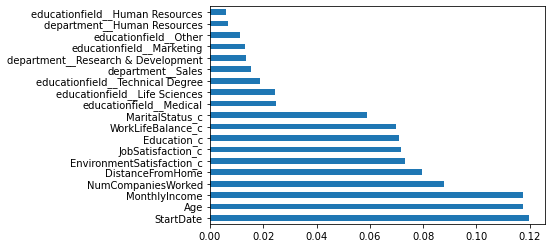

In [11]:
#Tree-based feature selection
tree = ExtraTreesClassifier()
tree.fit(data, target)

df_feature_importances = pd.Series(tree.feature_importances_, index=data.columns)
#print(df_feature_importances.nlargest(19))
df_feature_importances.nlargest(19).plot(kind="barh")

## Correlation matrix

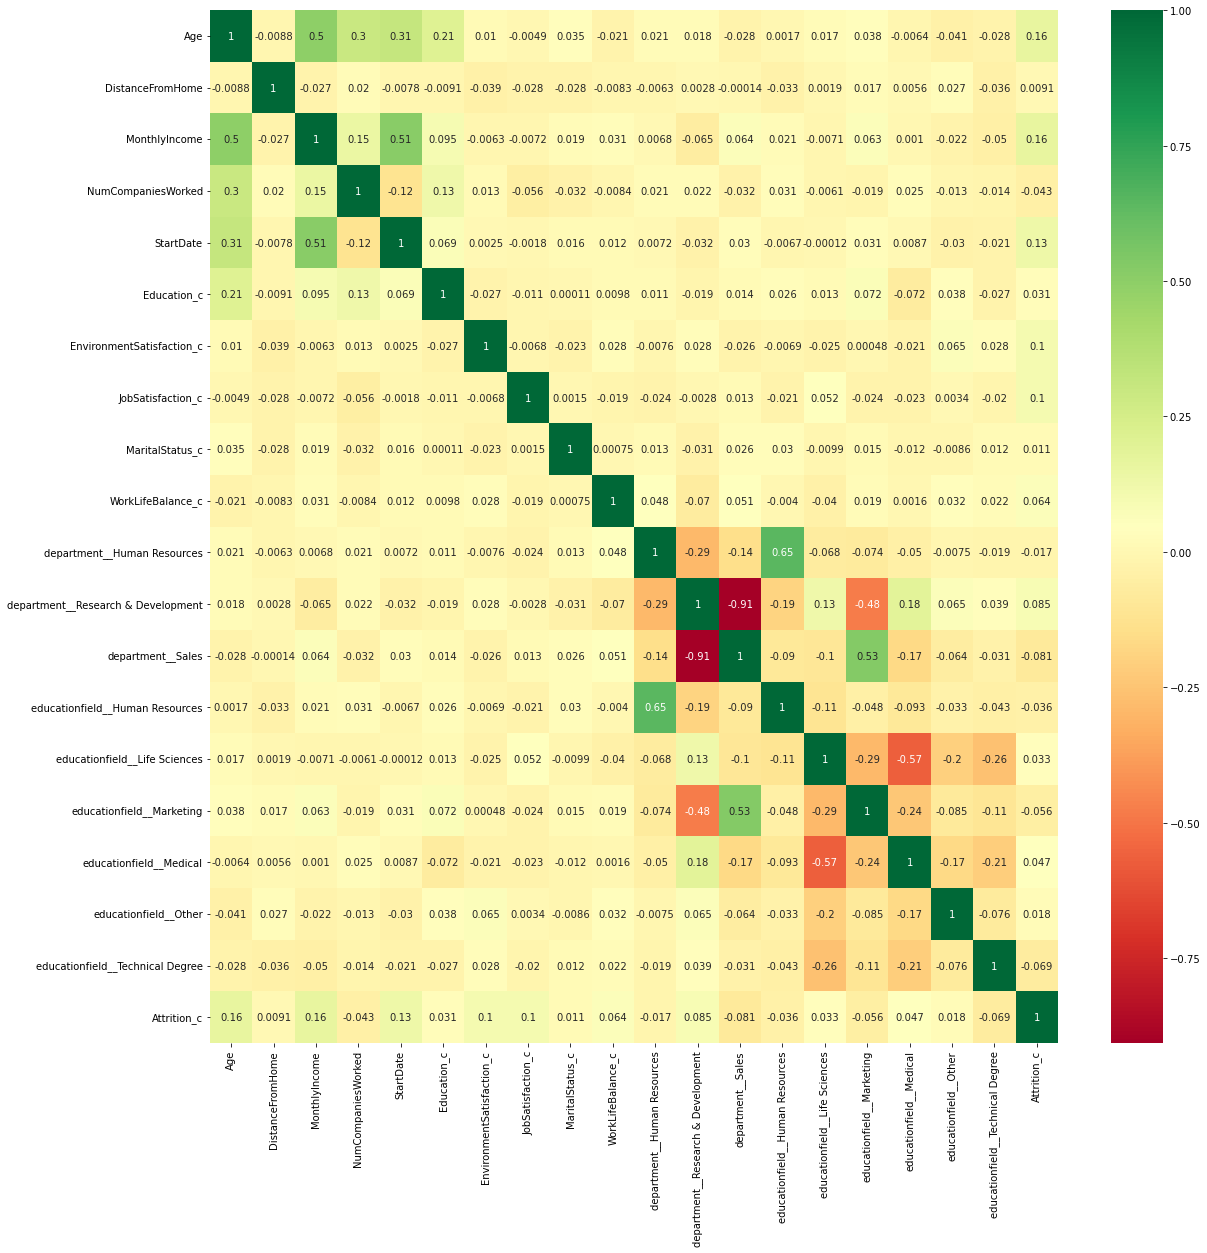

In [12]:
#Correlation matrix
combine = pd.concat([data, target], axis=1)
corr_mat = combine.corr()

plt.figure(figsize=(19,19))
g=sns.heatmap(corr_mat,annot=True,cmap="RdYlGn")

## Drop low correlation features
### From the analysis above, we selected 11 features, which are: 
    ·MonthlyIncome
    ·department__Sales
    ·educationfield__Technical Degree
    ·educationfield__Marketing
    ·Age
    ·department__Research & Development
    ·JobSatisfaction_c
    ·EnvironmentSatisfaction_c
    ·StartDate
    ·educationfield__Medical
    ·educationfield__Human Resources 

In [ ]:
to_drop = ["educationfield__Life Sciences", "NumCompaniesWorked", "WorkLifeBalance_c", "educationfield__Other", "department__Human Resources", "Education_c", "DistanceFromHome", "MaritalStatus_c"]
data.drop(to_drop, inplace=True, axis=1)
combine = pd.concat([data,target], axis=1)
combine.to_csv("Clean_Selected.csv",index = 0)

In [13]:
df = pd.read_csv("Clean_Selected.csv")
df

,Age,MonthlyIncome,StartDate,EnvironmentSatisfaction_c,JobSatisfaction_c,department__Research & Development,department__Sales,educationfield__Human Resources,educationfield__Marketing,educationfield__Medical,educationfield__Technical Degree,Attrition_c
0,41,599300,2257,1,3,0,1,0,0,0,0,0
1,49,513000,3762,2,1,1,0,0,0,0,0,1
2,37,209000,161,3,2,1,0,0,0,0,0,0
3,33,290900,3057,3,2,1,0,0,0,0,0,1
4,27,346800,1009,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,257100,2043,2,3,1,0,0,0,1,0,1
1466,39,999100,2713,3,0,1,0,0,0,1,0,1
1467,27,614200,2469,1,1,1,0,0,0,0,0,1
1468,49,539000,3546,3,1,0,1,0,0,1,0,1


# Step 5
# Modeling & Improving

In [14]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, RandomForestClassifier, VotingClassifier

### We will use three different model to make predictions, which are
    ·Decision tree algorithms
    ·K-Nearest Neighbours algorithm    
    ·Bayesian algorithms
### We divided the dataset into training part(80%) and testing part(20%)

## Decision Tree

In [15]:
data = pd.read_csv("Clean_Selected.csv").drop("Attrition_c", axis=1)
target = pd.read_csv("Clean_Selected.csv")["Attrition_c"]

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

X_train, X_valid, y_train, y_valid = train_test_split(data_scaled, target, test_size=0.2)

X_train_cat = X_train[["MonthlyIncome","department__Sales","educationfield__Technical Degree","educationfield__Marketing","Age","department__Research & Development","JobSatisfaction_c","EnvironmentSatisfaction_c","StartDate", "educationfield__Medical", "educationfield__Human Resources"]]
X_valid_cat = X_valid[["MonthlyIncome","department__Sales","educationfield__Technical Degree","educationfield__Marketing","Age","department__Research & Development","JobSatisfaction_c","EnvironmentSatisfaction_c","StartDate", "educationfield__Medical", "educationfield__Human Resources"]]

cat_tree = DecisionTreeClassifier(criterion="entropy", random_state=30)
cat_tree.fit(X_train_cat, y_train)
y_pred = cat_tree.predict(X_valid_cat)

print("Accuracy:", metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.7346938775510204


For decision tree algorithms, the longer the decision tree branches, the more overfitting occurs. 
In order to reduce overfitting, we can use pruning methods.

In a decision tree, one way of pre-pruning is to stop early. We can limit the maximum depth of the tree and limit overfitting.

In the following we will evaluate the performance of the decision tree on the basis of different parameters.


### Hyperparameter tuning
We will use two parameters from the decision tree.

    ·criterion
    
    ·max_depth
    
We will now test the accuracy of the decision tree correspondence for 'entropy' and 'gini' separately. The range of maximum depths is limited to 1 to 60.

### Entropy with max_depth in range 1 to 60

Text(0, 0.5, 'Accuracy')

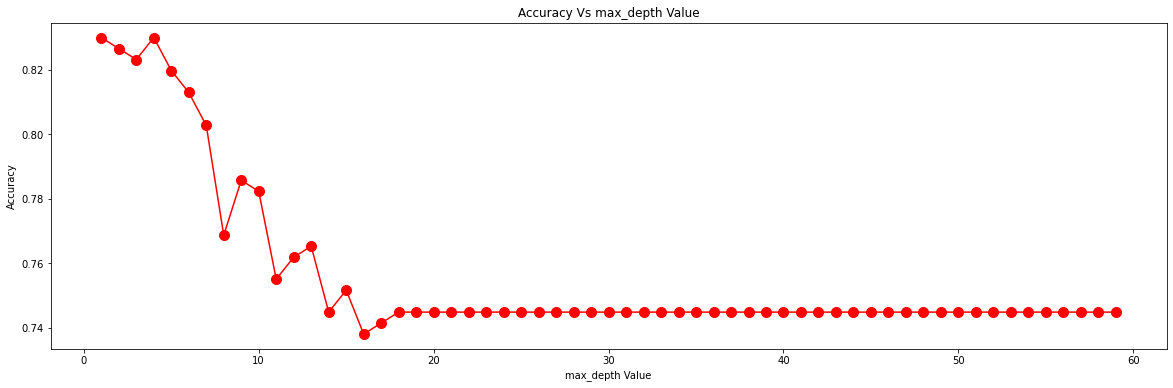

In [16]:
accuracy = []
for i in range(1, 60):
    entropy_tree_ent = DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state=30)
    entropy_tree_ent.fit(X_train, y_train)
    y_pred = entropy_tree_ent.predict(X_valid)
    accuracy.append(metrics.accuracy_score(y_valid, y_pred))
    
plt.figure(figsize=(20, 6))
plt.plot(range(1, 60), accuracy, color="red", marker="o", markersize=10)
plt.title("Accuracy Vs max_depth Value")
plt.xlabel("max_depth Value")
plt.ylabel("Accuracy")

From the above diagram we can roughly assume that max_depth=5 is the most accurate.

### Gini with max_depth in range 1 to 60

Text(0, 0.5, 'Accuracy')

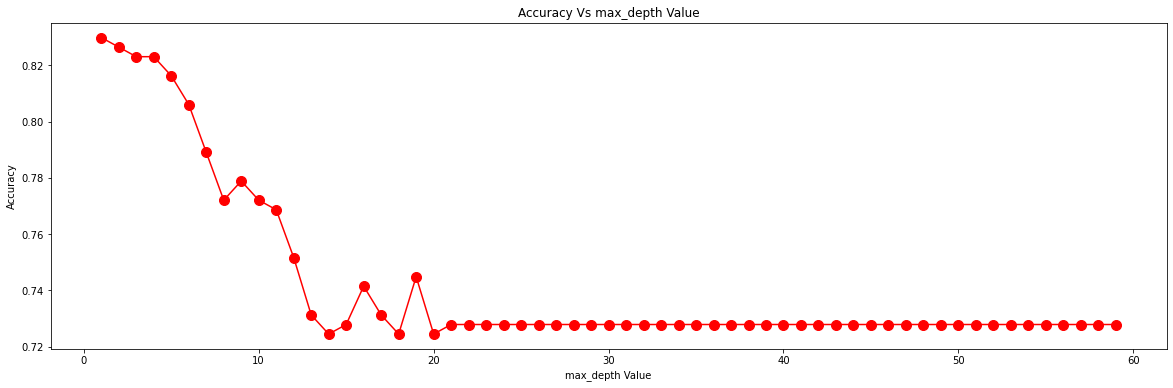

In [17]:
accuracy = []
for i in range(1, 60):
    entropy_tree_ent = DecisionTreeClassifier(criterion="gini", max_depth=i, random_state=30)
    entropy_tree_ent.fit(X_train, y_train)
    y_pred = entropy_tree_ent.predict(X_valid)
    accuracy.append(metrics.accuracy_score(y_valid, y_pred))
    
plt.figure(figsize=(20, 6))
plt.plot(range(1, 60), accuracy, color="red", marker="o", markersize=10)
plt.title("Accuracy Vs max_depth Value")
plt.xlabel("max_depth Value")
plt.ylabel("Accuracy")

From the above diagram we can roughly assume that max_depth=3 is the most accurate.

Having obtained the highest accurate values for entropy and gini, we make a cross-sectional comparison to arrive at the highest accurate value in the decision tree.

### Entropy with max_depth=5 & Gini with max_depth=3

In [18]:
entropy_tree_ent = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=30)
entropy_tree_ent.fit(X_train, y_train)
y_pred = entropy_tree_ent.predict(X_valid)

print(metrics.classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.16      0.23        50
           1       0.85      0.95      0.90       244

    accuracy                           0.82       294
   macro avg       0.63      0.56      0.56       294
weighted avg       0.77      0.82      0.78       294



In [19]:
print("Accuracy:", metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.8197278911564626


In [20]:
entropy_tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=30)
entropy_tree_gini.fit(X_train, y_train)
y_pred = entropy_tree_gini.predict(X_valid)

print(metrics.classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.06      0.10        50
           1       0.84      0.98      0.90       244

    accuracy                           0.82       294
   macro avg       0.61      0.52      0.50       294
weighted avg       0.76      0.82      0.77       294



In [21]:
print("Accuracy:", metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.8231292517006803


The comparison shows that the highest performance of the decision tree is achieved when the criterion is gini and the maximum depth is 3.

## K-Nearest Neighbours

In [22]:
data = pd.read_csv("Clean_Selected.csv").drop("Attrition_c", axis=1)
target = pd.read_csv("Clean_Selected.csv")["Attrition_c"]

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.2)

fivenn = KNeighborsClassifier(n_neighbors=5)
fivenn.fit(X_train, y_train)

pred = fivenn.predict(X_test)

default_acc = metrics.accuracy_score(y_test, pred)

print("Accuracy for model k=5:", default_acc)

Accuracy for model k=5: 0.8231292517006803


There are two parameters in the KNN algorithm, the number of neighbouring point values k, which appeared above, and the distance measure p. In the following we evaluate the performance of the KNN algorithm when k and p take different values.

In the above training of the KNN algorithm, we used k=5, which is the default value of k in the KNN algorithm; the KNN classifier from Sci-kit learn uses the Minkowski distance at p=2 as the default distance metric, and the Manhattan distance at p=1. In the following we will evaluate the performance of the KNN algorithm for k from 1 to 60 based on two different distance measures (Minkowski distance and Manhattan distance).

### Manhattan distance with k in range 1 to 60

Text(0, 0.5, 'Accuracy')

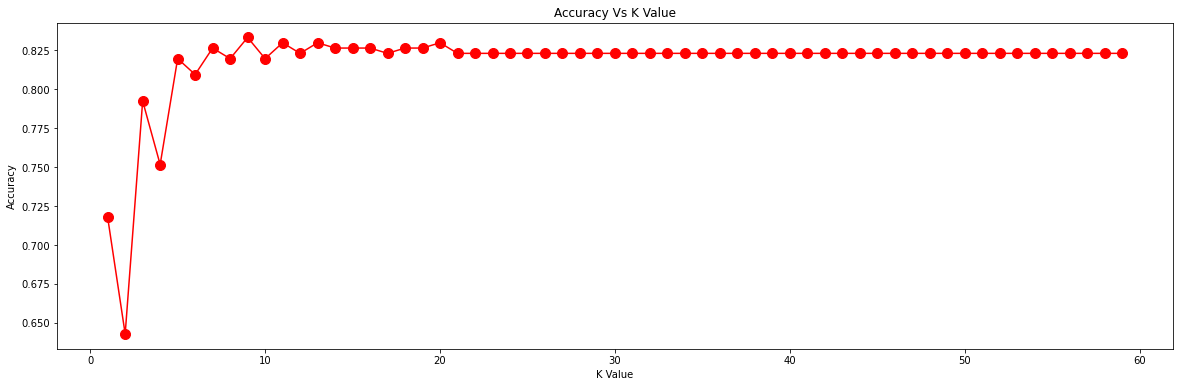

In [23]:
accuracy = []

for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i, p=1)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_i))
    
plt.figure(figsize=(20, 6))
plt.plot(range(1, 60), accuracy, color="red", marker="o",markersize=10)
plt.title("Accuracy Vs K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")

It can be seen from the graph above that the KNN algorithm, which takes the Manhattan distance as a distance measure, has the strongest performance when k = 5.

### Minkowski distance with k in range 1 to 60

Text(0, 0.5, 'Accuracy')

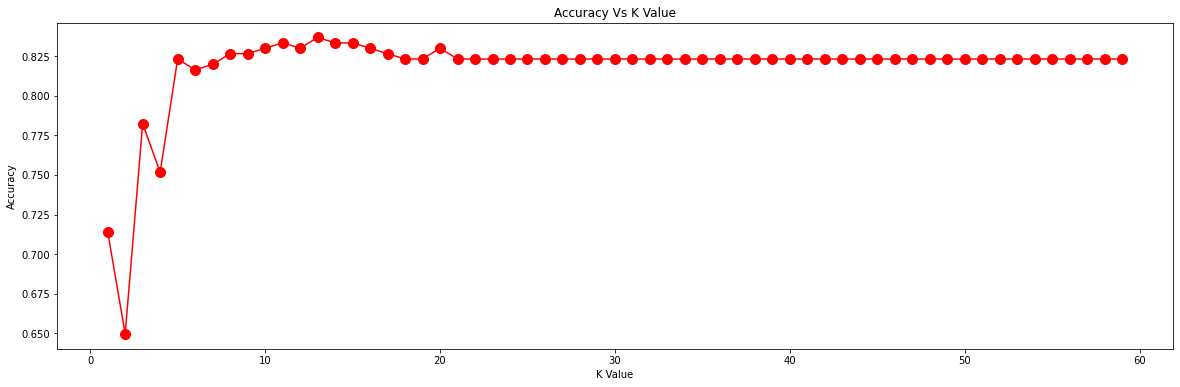

In [24]:
accuracy = []

for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i, p=2)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, pred_i))
    
plt.figure(figsize=(20, 6))
plt.plot(range(1, 60), accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

It can be seen from the graph above that the KNN algorithm, which takes the Minkowski distance as a distance measure, has the strongest performance when k = 7

In the following we will perform a cross-sectional comparison of the performance of the optimal KNN algorithm at different distance measures.

#### Manhattan distance with k=5 & Minkowski distance with k=7

In [25]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)
knn.fit(X_train, y_train)
pred_i = knn.predict(X_test)

print(metrics.classification_report(y_test, pred_i))

              precision    recall  f1-score   support

           0       0.47      0.15      0.23        52
           1       0.84      0.96      0.90       242

    accuracy                           0.82       294
   macro avg       0.66      0.56      0.56       294
weighted avg       0.78      0.82      0.78       294



In [26]:
print("Accuracy for model k=5, p=1:", metrics.accuracy_score(y_test, pred_i))

Accuracy for model k=5, p=1: 0.8197278911564626


In [27]:
knn = KNeighborsClassifier(n_neighbors=7, p=2)
knn.fit(X_train, y_train)
pred_i = knn.predict(X_test)

print(metrics.classification_report(y_test, pred_i))

              precision    recall  f1-score   support

           0       0.44      0.08      0.13        52
           1       0.83      0.98      0.90       242

    accuracy                           0.82       294
   macro avg       0.64      0.53      0.52       294
weighted avg       0.76      0.82      0.76       294



In [28]:
print("Accuracy for model k=7, p=2:", metrics.accuracy_score(y_test, pred_i))

Accuracy for model k=7, p=2: 0.8197278911564626


By comparison we can see that the KNN algorithm has the highest performance when k=7 and p=2

## Bayesian Algorithm

In [29]:
data = pd.read_csv("Clean_Selected.csv").drop("Attrition_c", axis=1)
target = pd.read_csv("Clean_Selected.csv")["Attrition_c"]

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.2)
    
gnb = GaussianNB()

gnb.fit(X_train, y_train)

pred = gnb.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, pred))
print(classification_report(y_pred=pred, y_true=y_test))

Accuracy: 0.8401360544217688
              precision    recall  f1-score   support

           0       0.22      0.24      0.23        29
           1       0.92      0.91      0.91       265

    accuracy                           0.84       294
   macro avg       0.57      0.57      0.57       294
weighted avg       0.85      0.84      0.84       294



In [30]:
print(classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.22      0.24      0.23        29
           1       0.92      0.91      0.91       265

    accuracy                           0.84       294
   macro avg       0.57      0.57      0.57       294
weighted avg       0.85      0.84      0.84       294



As the plain Bayesian algorithm has no parameters, we cannot use hyperparameters for further optimisation.

# Step 6
# Evalution

In [31]:
data = pd.read_csv("Clean_Selected.csv").drop("Attrition_c", axis=1)
target = pd.read_csv("Clean_Selected.csv")["Attrition_c"]

X_train_val, X_test, y_train_val, y_test = train_test_split(data, target)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val)

We take out the corresponding algorithm models for the optimal parameter configurations of the three algorithms that have already been obtained during previous modelling.

In [32]:
entropy_tree_ent = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=30)
knn = KNeighborsClassifier(n_neighbors=7, p=2)
gnb = GaussianNB()

## Time performance 

### training time for Decision Tree:

In [33]:
%%time
entropy_tree_ent.fit(X_train,y_train)

Wall time: 3 ms


DecisionTreeClassifier(max_depth=3, random_state=30)

### training time for KNN:

In [34]:
%%time
knn.fit(X_train,y_train)

Wall time: 1.99 ms


KNeighborsClassifier(n_neighbors=7)

### training time for Naive Bayesian:

In [35]:
%%time
gnb.fit(X_train,y_train)

Wall time: 2 ms


GaussianNB()

### prediction time for Decision Tree:

In [36]:
%%time
pred_entropy_tree_ent = entropy_tree_ent.predict(X_val)

Wall time: 989 µs


### prediction time for KNN:

In [37]:
%%time
pred_knn = knn.predict(X_val)

Wall time: 8 ms


### prediction time for Naive Bayesian:

In [38]:
%%time
pred_gnb = gnb.predict(X_val)

Wall time: 2.01 ms


Thus, the Naive Bayesian algorithm is fast in both training and prediction; the decision tree algorithm is slow in training the model but extremely fast in prediction; and the KNN algorithm is fast in training but slow in prediction.

Overall, the time performance of the Naive Bayesian algorithm is the best, followed by the KNN, and the time performance of decision tree is the worst.

## Prediction performance

We chose to use a confusion matrix as well as a classification report to check the predictive performance of the three models.

### Decision Tree algorithm:

In [39]:
confusion_matrix(y_true=y_val, y_pred=pred_entropy_tree_ent)

array([[  2,  43],
       [  5, 226]], dtype=int64)

In [40]:
print(classification_report(y_true=y_val, y_pred=pred_entropy_tree_ent))

              precision    recall  f1-score   support

           0       0.29      0.04      0.08        45
           1       0.84      0.98      0.90       231

    accuracy                           0.83       276
   macro avg       0.56      0.51      0.49       276
weighted avg       0.75      0.83      0.77       276



In [41]:
print("Accuracy:", metrics.accuracy_score(y_val, pred_entropy_tree_ent))

Accuracy: 0.8260869565217391


### KNN algorithm:

In [42]:
confusion_matrix(y_true=y_val, y_pred=pred_knn)

array([[  1,  44],
       [  5, 226]], dtype=int64)

In [43]:
print(classification_report(y_true=y_val, y_pred=pred_knn))

              precision    recall  f1-score   support

           0       0.17      0.02      0.04        45
           1       0.84      0.98      0.90       231

    accuracy                           0.82       276
   macro avg       0.50      0.50      0.47       276
weighted avg       0.73      0.82      0.76       276



In [44]:
print("Accuracy:", metrics.accuracy_score(y_val, pred_knn))

Accuracy: 0.822463768115942


### Naive Bayesian algorithm:

In [45]:
confusion_matrix(y_true=y_val, y_pred=pred_gnb)

array([[  0,  45],
       [  0, 231]], dtype=int64)

In [ ]:
print(classification_report(y_true=y_val, y_pred=pred_gnb))

In a preliminary judgement, it is clear that the predictive performance of the Naive Bayesian algorithm is very different compared to the other two models, while the predictive performance of the KNN algorithm is slightly worse than that of the decision tree algorithm.

## Cross validation
In order to verify the effect of different samples on the training of the three models, we have chosen here to use k-fold cross-validation to maximise the use of the data in the dataset.

Here we chose to do 10-fold cross-validation using all training and validation data for all three models and used the macro average f1 score as the scoring method.

### Decision Tree algorithm:

In [47]:
scores = cross_val_score(estimator=entropy_tree_ent, X=X_train_val, y=y_train_val, cv=10, scoring='f1_macro')
print('F1_score: %0.2f std: %0.2f'%(scores.mean(), scores.std()))

F1_score: 0.52 std: 0.06


### K-Nearest Neighbours algorithm:

In [48]:
scores = cross_val_score(estimator=knn, X=X_train_val, y=y_train_val, cv=10, scoring='f1_macro')
print('F1_score: %0.2f std: %0.2f'%(scores.mean(), scores.std()))

F1_score: 0.51 std: 0.05


### Naive Bayesian algorithm:

In [49]:
scores = cross_val_score(estimator=gnb, X=X_train_val, y=y_train_val, cv=10, scoring='f1_macro')
print('F1_score: %0.2f std: %0.2f'%(scores.mean(), scores.std()))

F1_score: 0.46 std: 0.00


From this we can conclude that the Decision Tree algorithm still performs slightly better than the decision tree in different sample situations.